# OPERATIONAL EFFICIENCY OF CAPITAL - ROIC & ROIIC

Positive earnings do not always equate to value creation. For a company to create value, it needs to earn a higher return on its invested capital than its cost of capital. ROIC and ROIIC are financial metrics that can be used to assess whether a company is creating value. The metrics tell us about the operational efficiency of the business from a capital perspective: "Is the company generating a return on the capital it has utilized to run the business?". However, ROIC is not always comparable across companies/industries. Treatment of intangible assets can create issues. For more on the topic of intangibles, read "ROIC and Intangible Assets" by Michael Mauboussin. This notebook will calculate ROIC and ROIIC within one sector (Consumer Staples via Vanguard Consumer Staples ETF "VDC"). This will make the results more comparable across companies.



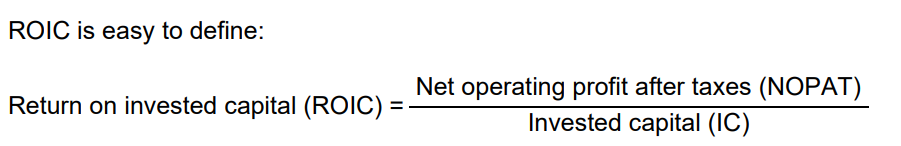

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:20,.4f}'.format

import os
os.chdir("E:\\SEGResearch\\Research\\Equity Research\\")

#### IMPORT DATA

In [2]:
file_name = "2023_ROIC_Data.xlsx"

# FROM THE INCOME STATEMENT
AMORT_EXP = pd.read_excel(file_name, sheet_name="AMORT_EXP", index_col=0)
EBIT_OPER = pd.read_excel(file_name, sheet_name="EBIT_OPER", index_col=0)
INT_EXP_DEBT = pd.read_excel(file_name, sheet_name="INT_EXP_DEBT", index_col=0)
INC_TAX = pd.read_excel(file_name, sheet_name="INC_TAX", index_col=0)
NET_INC = pd.read_excel(file_name, sheet_name="NET_INC", index_col=0)

# FROM THE BALANCE SHEET

# LIABILITIES
LIABS = pd.read_excel(file_name, sheet_name="LIABS", index_col=0)
LIABS_CURR = pd.read_excel(file_name, sheet_name="LIABS_CURR", index_col=0)
DEBT_ST = pd.read_excel(file_name, sheet_name="DEBT_ST", index_col=0)
DEBT_LT_NET = pd.read_excel(file_name, sheet_name="DEBT_LT_NET", index_col=0)
DFD_TAX = pd.read_excel(file_name, sheet_name="DFD_TAX", index_col=0)
OPER_LEASE_COMMIT = pd.read_excel(file_name, sheet_name="OPER_LEASE_COMMIT", index_col=0)

# SHAREHOLDER EQUITY
PFD_STK = pd.read_excel(file_name, sheet_name="PFD_STK", index_col=0)
SHLDRS_EQ = pd.read_excel(file_name, sheet_name="SHLDRS_EQ", index_col=0)

# COST OF DEBT & EQUITY
WAVG_COST_DEBT = pd.read_excel(file_name, sheet_name="WAVG_COST_DEBT", index_col=0)
ERP = pd.read_excel(file_name, sheet_name="ERP", index_col=0, parse_dates = True)

In [3]:
LT_LIABS = LIABS- LIABS_CURR
OTHER_LT_LIABS = LT_LIABS - DEBT_LT_NET - DFD_TAX

#### WEIGHTED AVERAGE COST OF DEBT

In [4]:
WAVG_COST_DEBT

,LANC,USNA,WBA,IMKTA,KO,IPAR,MKC,HAIN,CLX,MNST,...,AVO,SKIN,BHIL,NAPA,WEST,SOVO,OLPX,COCO,KVUE,US92202X209
2012-12-31,NaN,NaN,NaN,6.6991,0.8616,NaN,1.4975,5.9800,1.6369,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-31,NaN,NaN,NaN,5.7500,2.2302,NaN,2.5438,5.9800,2.4284,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,NaN,NaN,NaN,5.6159,1.0140,NaN,2.0283,2.7166,1.8276,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,NaN,NaN,3.6315,5.3090,2.1367,0.8000,2.5976,2.4842,2.6238,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,2.5912,5.0397,2.3187,NaN,2.6279,1.8100,2.0436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,3.1918,6.2214,1.9853,NaN,3.1274,2.9300,2.4641,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,NaN,3.8985,5.4430,2.8699,1.2000,4.0972,3.5100,3.6343,NaN,...,4.4776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,NaN,NaN,2.8457,5.1122,2.0142,1.9174,2.5355,4.2000,2.5798,5.5000,...,3.7853,NaN,NaN,NaN,NaN,7.5000,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,2.2673,5.3359,1.2621,2.6847,1.2755,1.8900,1.2281,NaN,...,2.2033,NaN,NaN,1.8000,NaN,5.7000,7.5000,NaN,NaN,NaN
2021-12-31,NaN,NaN,1.8036,3.6759,2.1337,2.3244,1.7875,1.0900,1.3020,NaN,...,2.0850,NaN,NaN,1.9067,NaN,4.5000,7.5000,NaN,NaN,NaN


Some companies are missing values (typically they don't have debt on the balance sheet). We still have to estimate their cost of debt. Since these companies are all within one sector, we will fill in the missing values with the row average. Of course, this is not ideal, as we assume that the missing cost of debt will equal the sector average for the period.

In [5]:
COST_DEBT = WAVG_COST_DEBT.apply(lambda row: row.fillna(row.mean()), axis = 1) # Fill missing values with rows average
COST_DEBT = COST_DEBT/100
COST_DEBT

,LANC,USNA,WBA,IMKTA,KO,IPAR,MKC,HAIN,CLX,MNST,...,AVO,SKIN,BHIL,NAPA,WEST,SOVO,OLPX,COCO,KVUE,US92202X209
2012-12-31,0.0353,0.0353,0.0353,0.0670,0.0086,0.0353,0.0150,0.0598,0.0164,0.0353,...,0.0353,0.0353,0.0353,0.0353,0.0353,0.0353,0.0353,0.0353,0.0353,0.0353
2013-12-31,0.0382,0.0382,0.0382,0.0575,0.0223,0.0382,0.0254,0.0598,0.0243,0.0382,...,0.0382,0.0382,0.0382,0.0382,0.0382,0.0382,0.0382,0.0382,0.0382,0.0382
2014-12-31,0.0358,0.0358,0.0358,0.0562,0.0101,0.0358,0.0203,0.0272,0.0183,0.0358,...,0.0358,0.0358,0.0358,0.0358,0.0358,0.0358,0.0358,0.0358,0.0358,0.0358
2015-12-31,0.0357,0.0357,0.0363,0.0531,0.0214,0.0080,0.0260,0.0248,0.0262,0.0357,...,0.0357,0.0357,0.0357,0.0357,0.0357,0.0357,0.0357,0.0357,0.0357,0.0357
2016-12-31,0.0367,0.0367,0.0259,0.0504,0.0232,0.0367,0.0263,0.0181,0.0204,0.0367,...,0.0367,0.0367,0.0367,0.0367,0.0367,0.0367,0.0367,0.0367,0.0367,0.0367
2017-12-31,0.0378,0.0378,0.0319,0.0622,0.0199,0.0378,0.0313,0.0293,0.0246,0.0378,...,0.0378,0.0378,0.0378,0.0378,0.0378,0.0378,0.0378,0.0378,0.0378,0.0378
2018-12-31,0.0445,0.0445,0.0390,0.0544,0.0287,0.0120,0.0410,0.0351,0.0363,0.0445,...,0.0448,0.0445,0.0445,0.0445,0.0445,0.0445,0.0445,0.0445,0.0445,0.0445
2019-12-31,0.0398,0.0398,0.0285,0.0511,0.0201,0.0192,0.0254,0.0420,0.0258,0.0550,...,0.0379,0.0398,0.0398,0.0398,0.0398,0.0750,0.0398,0.0398,0.0398,0.0398
2020-12-31,0.0307,0.0307,0.0227,0.0534,0.0126,0.0268,0.0128,0.0189,0.0123,0.0307,...,0.0220,0.0307,0.0307,0.0180,0.0307,0.0570,0.0750,0.0307,0.0307,0.0307
2021-12-31,0.0300,0.0300,0.0180,0.0368,0.0213,0.0232,0.0179,0.0109,0.0130,0.0300,...,0.0209,0.0300,0.0300,0.0191,0.0300,0.0450,0.0750,0.0300,0.0300,0.0300


#### NET OPERATING PROFIT BEFORE TAX (NOPBT)

Earnings Before Interest & Taxes

 $+$ Amortization of Acquired Intangibles
 
 $+$ Implicit Operating Lease Interest Expense


Net Operating Profit Before Taxes

We add back the Amortization of Acquired Intangible Assets. The company expenses its investment to replenish acquired intangible assets in the income statement. Since the replenishment is already expensed, we do not want to penalize the income twice, first from the expense to replenish and second from the amortization of the initial purchase price.

Since we do not have the duration of the lease, we estimated the implicit lease interest crudely (not with the present value). We know that the Operating Lease Expense contains both "Rent Payment" and an implicit "Interest Expense." First, we will assume that the interest rate on the lease will be equivalent to the company's cost of debt. Second, we will assume that rent and interest are proportional to the operating lease payment. I believe this is reasonable since the company will likely have to continue renewing the leases.  

Estimated Operating Lease Interest Expense = Operating Leases $*$ Cost of Debt


In [6]:
AMORT_EXP = AMORT_EXP.ffill(limit=1).fillna(0)

In [7]:
OPER_LEASE_COMMIT = OPER_LEASE_COMMIT.ffill() # We forward fill the data since there are missing values between periods
OPER_LEASE_INT = OPER_LEASE_COMMIT * COST_DEBT
OPER_LEASE_INT

,LANC,USNA,WBA,IMKTA,KO,IPAR,MKC,HAIN,CLX,MNST,...,AVO,SKIN,BHIL,NAPA,WEST,SOVO,OLPX,COCO,KVUE,US92202X209
2012-12-31,0.4072,0.6442,"1,265.7740",7.4369,8.0219,1.0623,1.2743,5.8179,4.1087,0.5502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-31,0.5043,0.6862,"1,362.3827",5.6770,23.3052,1.2780,2.1928,5.6921,7.2366,0.6630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,0.4112,0.8195,"1,235.3624",4.9764,9.7850,1.2510,1.8721,2.6947,6.0127,0.4650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,0.5545,1.0687,"1,378.8989",4.1837,15.2987,0.2615,2.4496,2.4557,7.8978,0.3825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,0.8546,0.7330,883.3063,1.3633,15.8370,1.0135,2.8565,1.9401,6.7029,0.6888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,1.0275,0.8918,"1,047.2610",1.8206,10.7604,0.9723,5.3791,2.9838,8.5010,0.6312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,1.0301,1.1153,"1,276.2160",2.2745,14.3493,0.5281,6.3015,3.6382,11.9932,1.2444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,1.5227,1.0969,918.2464,2.6491,31.1188,0.6345,4.1126,4.9956,10.0354,1.5382,...,0.7945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,0.8125,0.6945,716.2217,3.3455,23.1337,0.7768,1.8827,2.1436,4.6053,0.7487,...,1.1788,NaN,NaN,0.5131,NaN,1.4953,NaN,0.0802,NaN,NaN
2021-12-31,0.7707,0.5404,564.4982,2.0002,35.1422,0.8812,2.7564,1.2622,5.3511,0.7403,...,1.5617,NaN,NaN,0.4609,NaN,1.1023,NaN,0.0454,4.1635,NaN


Put it all together to calculate Net Operating Income Before Taxes:

In [8]:
NOPBT = EBIT_OPER + AMORT_EXP.fillna(0) + OPER_LEASE_INT.fillna(0)
NOPBT

,LANC,USNA,WBA,IMKTA,KO,IPAR,MKC,HAIN,CLX,MNST,...,AVO,SKIN,BHIL,NAPA,WEST,SOVO,OLPX,COCO,KVUE,US92202X209
2012-12-31,144.7772,99.9322,"5,068.7740",129.1694,"11,645.0219",89.4493,584.9743,159.8429,901.1087,551.2222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-31,163.3553,118.2902,"5,314.3827",126.9895,"11,252.3052",86.2320,602.1928,209.0361,982.2366,600.3280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,155.1242,117.3175,"5,303.3624",127.4957,"11,353.7850",59.9200,616.7721,258.8837,968.0127,752.9700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,157.0205,143.6747,"6,779.8989",141.1745,"10,043.2987",72.6425,620.1496,273.1937,"1,021.8978",936.2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,188.3296,140.9590,"7,648.3063",131.1739,"9,563.8370",74.6805,672.9565,305.5201,"1,082.7029","1,175.1478",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,198.0195,134.8758,"7,692.2610",128.2687,"8,970.9604",87.7093,808.0791,181.7978,"1,140.5010","1,246.1432",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,179.1751,190.9733,"8,075.2160",126.0698,"9,439.3493",102.1901,972.3015,170.2562,"1,147.9932","1,323.3634",...,18.7210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,182.7087,148.7289,"6,597.2464",150.4899,"10,655.1188",110.3905,"1,001.3126",74.7376,"1,134.0354","1,427.3772",...,107.3015,25.8250,NaN,71.0320,NaN,17.7270,60.3370,15.3070,"2,885.0000",NaN
2020-12-31,182.9645,178.5115,"4,924.2217",279.5482,"9,562.1337",76.1268,"1,039.2827",146.6666,"1,282.6053","1,641.8017",...,69.5788,-1.2095,-0.0056,93.0421,NaN,70.7893,148.4690,31.7572,"3,394.0000",NaN
2021-12-31,187.3857,171.9144,"5,105.4982",341.8019,"10,897.1422",157.2292,"1,140.5564",195.3772,"1,274.3511","1,807.9073",...,63.2617,15.5880,-110.1640,87.3659,-0.8854,89.4023,405.6710,25.8544,"3,481.1635",NaN


Let's plot for a sanity check:

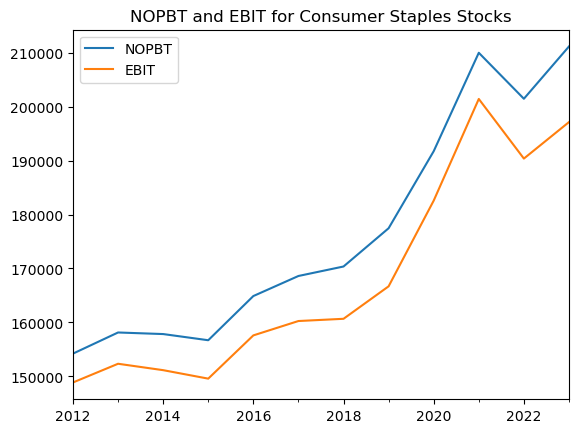

In [9]:
NOPBT.sum(axis = 1).plot()
EBIT_OPER.sum(axis=1).plot(title = 'NOPBT and EBIT for Consumer Staples Stocks')
plt.legend(["NOPBT", "EBIT"])

It looks as expected. NOBPT should be higher than EBIT since we are adding back amortization from acquired intangibles and implicit interest expense from operating leases.

#### CORPORATE TAX CONSIDERATIONS

The typical way to calculate NOPAT: 
NOPAT = EBITA - cash taxes 
cash taxes = income taxes (income statement) $+$ net deferred tax (balance sheet change from prior year) $+$ interest expense tax shield

A few notes on corporate taxes:
1. Corporate tax rates and laws change. This means that past years might not always be comparable to current and future years. 
2. Companies with negative operating earnings don't pay taxes and carry the loss forward to offset future earnings. However, this is only an asset if the business can generate income in the future.
3. Many companies operate globally, and using the US tax regulation, we ignore favorable tax treatment from the global geographical revenue mix.

In [10]:
INT_EXP_DEBT = INT_EXP_DEBT.ffill(limit=1).fillna(0)

As of 2022, interest expense deduction is limited to 30% of EBIT. We will limit interest deductibility to 30% of EBIT for all past periods. I understand that the deductible limit was different in the past, but we will keep it simple and assume that it was always the current 30% of the EBIT limit.

<Axes: title={'center': 'Equities with Interest Expense exceeding 30% of EBIT (Most Recent)'}>

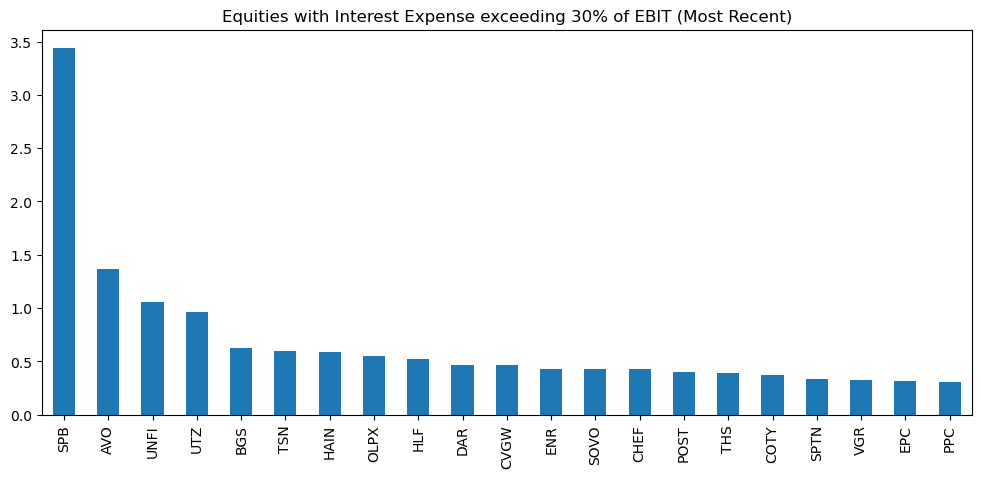

In [11]:
INT_TO_EBIT = (INT_EXP_DEBT/EBIT_OPER)
INT_ABOVE30_EBIT = (INT_TO_EBIT.iloc[-1] > 0.3)
INT_TO_EBIT.loc[:,INT_ABOVE30_EBIT].iloc[-1].sort_values(ascending = False).plot(kind = "bar", title = "Equities with Interest Expense exceeding 30% of EBIT (Most Recent)", figsize = (12,5))

In [12]:
INT_TO_EBIT[INT_TO_EBIT > 0.3] = 0.3 # Max deductiblee interest to EBIT is 30% of EBIT, so we put a ceiling at 0.3.
INT_TO_EBIT[INT_TO_EBIT < 0] = 0 # We cannot deduct the interest if EBIT is negative, so we put a floor at 0. 
DEDUCTIBLE_INT = (INT_TO_EBIT * EBIT_OPER).fillna(0)
DEDUCTIBLE_INT

,LANC,USNA,WBA,IMKTA,KO,IPAR,MKC,HAIN,CLX,MNST,...,AVO,SKIN,BHIL,NAPA,WEST,SOVO,OLPX,COCO,KVUE,US92202X209
2012-12-31,0.0000,0.0200,78.0000,36.5197,433.0000,1.7220,57.9000,15.8000,123.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2013-12-31,0.0000,0.0010,168.0000,36.3937,440.0000,1.3800,57.0000,19.4000,119.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2014-12-31,0.0000,0.1290,162.0000,36.7558,513.0000,1.4780,54.5000,23.4430,99.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2015-12-31,0.0000,0.0150,609.0000,41.0972,843.0000,1.8260,58.2000,24.8550,95.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2016-12-31,0.0000,0.4440,596.0000,38.9432,687.0000,2.4400,57.3000,25.1610,82.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2017-12-31,0.0000,0.0460,693.0000,37.9344,758.0000,2.4920,96.2000,21.2740,82.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-12-31,0.0000,0.0360,616.0000,37.1386,884.0000,2.8780,175.0000,26.9250,79.0000,0.0000,...,5.3960,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2019-12-31,0.0000,0.0660,704.0000,44.3522,894.0000,2.3460,165.7000,16.3344,91.0000,0.0000,...,10.3200,4.0386,0.0000,14.1786,0.0000,-0.0000,0.0000,1.1630,0.0000,0.0000
2020-12-31,0.0000,0.5070,639.0000,42.2047,"1,374.0000",2.1700,144.4000,17.4550,93.0000,0.0000,...,6.7000,0.0000,0.0000,17.9240,0.0000,13.8291,30.7776,0.7910,0.0000,0.0000
2021-12-31,0.0000,0.0570,491.0000,25.4631,747.0000,3.0250,146.8000,8.0290,93.0000,0.0000,...,3.7000,0.6873,-0.0000,13.6180,0.0000,18.3264,61.1480,0.3600,0.0000,0.0000


Next, we need to calculate the Effective Tax Rate. This will allow us to estimate the tax shield from interest expense. 

In [13]:
EFF_TAX_RATE = INC_TAX/EBIT_OPER
EFF_TAX_RATE[EFF_TAX_RATE < 0] = 0 # Set the effective tax rate to 0 for companies with negative EBIT.
EFF_TAX_RATE = EFF_TAX_RATE.fillna(0)
EFF_TAX_RATE

,LANC,USNA,WBA,IMKTA,KO,IPAR,MKC,HAIN,CLX,MNST,...,AVO,SKIN,BHIL,NAPA,WEST,SOVO,OLPX,COCO,KVUE,US92202X209
2012-12-31,0.3505,0.3259,0.3520,0.1964,0.2393,1.2026,0.2413,0.2841,0.2793,0.3798,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2013-12-31,0.3257,0.3218,0.3945,0.0449,0.2593,0.3769,0.2246,0.1798,0.2888,0.3756,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2014-12-31,0.3401,0.3361,0.4031,0.2314,0.1982,0.3627,0.2395,0.2914,0.3134,0.3492,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2015-12-31,0.3414,0.3382,0.2146,0.2563,0.2282,0.3232,0.2151,0.1894,0.3144,0.3700,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2016-12-31,0.3406,0.2778,0.1565,0.2345,0.1694,0.3520,0.2322,0.2491,0.3137,0.3153,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2017-12-31,0.3111,0.5442,0.1214,0.2403,0.6282,0.2825,0.1924,0.1362,0.2941,0.3088,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-12-31,0.2233,0.3466,0.1583,0.0000,0.1731,0.2760,0.0000,0.0000,0.2053,0.2292,...,0.8677,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2019-12-31,0.2548,0.3418,0.1147,0.1692,0.1715,0.2776,0.1611,0.0000,0.1843,0.2179,...,0.2281,0.0000,0.0000,0.1659,0.0000,3.8579,0.0000,0.1406,0.2696,0.0000
2020-12-31,0.2377,0.3019,0.0961,0.2044,0.2122,0.2765,0.1719,0.0467,0.1945,0.1326,...,0.2193,-0.0000,-0.0000,0.1470,0.0000,0.1448,0.0778,0.3583,0.0000,0.0000
2021-12-31,0.2394,0.3181,0.1660,0.2292,0.2450,0.2725,0.1748,0.2219,0.1462,0.2352,...,0.3420,0.0000,0.0000,0.2652,-0.0000,0.0602,0.1536,0.2130,0.2919,0.0000


Below, we will calculate the cash taxes and net operating profits after taxes:

In [14]:
INT_TAX_SHIELD = DEDUCTIBLE_INT * EFF_TAX_RATE
CHG_DFD_TAX = DFD_TAX.diff().fillna(0)*-1 # The increase/decrease in deferred taxes
CASH_TAXES =  INC_TAX + CHG_DFD_TAX + INT_TAX_SHIELD

CASH_TAXES[CASH_TAXES<0] = 0 # set all negative values to 0, since a company cannot have negative taxes

NOPAT = NOPBT - CASH_TAXES

Let's plot before-tax and after-tax net operating profit:

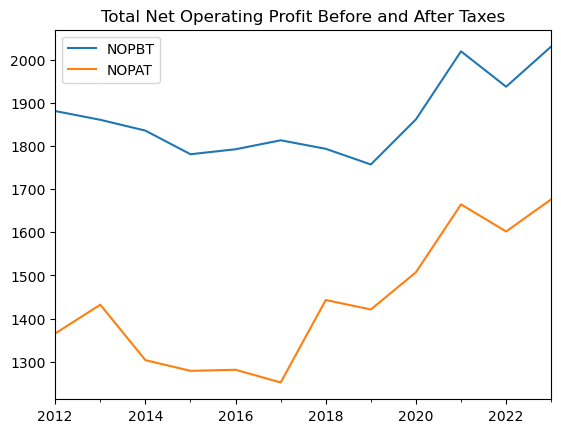

In [15]:
NOPBT.mean(axis=1).plot()
NOPAT.mean(axis=1).plot(title = "Total Net Operating Profit Before and After Taxes")
plt.legend(["NOPBT", "NOPAT"])

We can see an improvement in the after-tax income post-2018, consistent with the Tax Cuts and Jobs Act of 2017. 

#### INVESTED CAPITAL

Invested capital is the total amount of money a company raises by issuing securities to equity shareholders and debt to bondholders.

We will use the Financial Approach to calculate invested capital:

Short-Term Debt \
$+$ Long-Term Debt \
$+$ Deferred Taxes \
$+$ Other Long-term Liabilities \
$+$ Preferred Stock \
$+$ Common Equity 

=

Invested Capital

In [16]:
# We forward fill one time and set nans to 0. 
INVESTED_CAPITAL = DEBT_ST.ffill(limit=1).fillna(0) \
    + DEBT_LT_NET.ffill(limit=1).fillna(0) \
    + DFD_TAX.fillna(0).fillna(0) \
    + OTHER_LT_LIABS.ffill(limit=1).fillna(0) \
    + PFD_STK.ffill(limit=1).fillna(0) \
    + SHLDRS_EQ.ffill(limit=1).fillna(0)

INVESTED_CAPITAL = INVESTED_CAPITAL.replace(0,np.nan) # To avoid division by zero, we replace zero values with nans

#### RETURN ON INVESTED CAPITAL (ROIC)

In [17]:
ROIC = NOPAT/ INVESTED_CAPITAL
ROIC = ROIC.dropna(axis=1)

Let's see which companies had the highest ROIC as of the most recent period:

In [18]:
ROIC.iloc[-1].sort_values(ascending = False).head(10)

MED                  0.4282
CALM                 0.4164
VGR                  0.3169
MO                   0.3160
PM                   0.2782
CL                   0.2663
FIZZ                 0.2608
HSY                  0.2415
KMB                  0.2139
IPAR                 0.2083
Name: 2023-12-31 00:00:00, dtype: float64

Looking at only one period of ROIC data is not enough since ROIC can move around quite aggressively. Let's plot historical ROIC for CL, KO, HSY, and COST:

<Axes: title={'center': 'Historical ROIC of Selected Stocks'}>

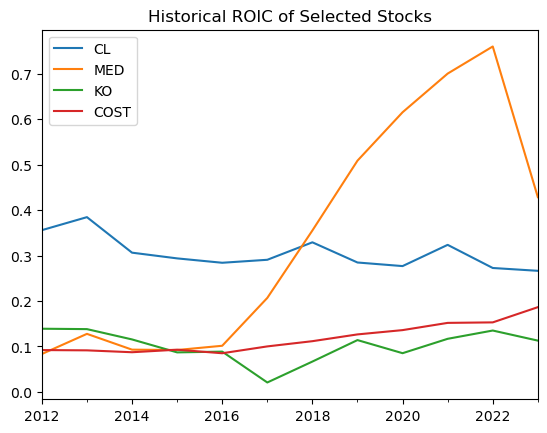

In [19]:
ROIC.loc[:,["CL", "MED", "KO", "COST"]].plot(title = "Historical ROIC of Selected Stocks")

<Axes: title={'center': 'Historical 3-Year Rolling Standard Deviation of ROIC'}>

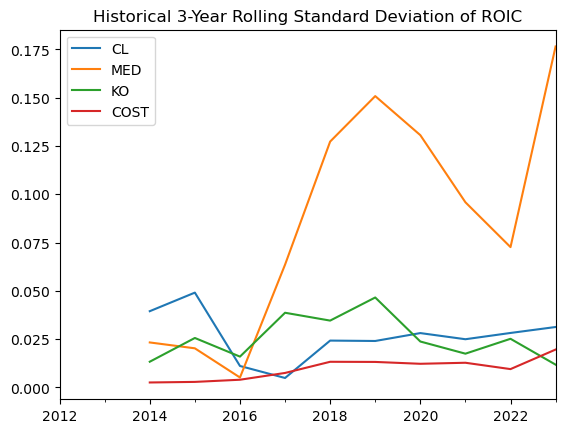

In [20]:
ROLL3_ROIC_STDEV = ROIC.rolling(3).std()
ROLL3_ROIC_STDEV.loc[:,["CL", "MED", "KO", "COST"]].plot(title = "Historical 3-Year Rolling Standard Deviation of ROIC")

Let's also plot the historical average ROIC for consumer staples overall: 

<Axes: title={'center': 'Average ROIC of Consumer Staples Equities'}>

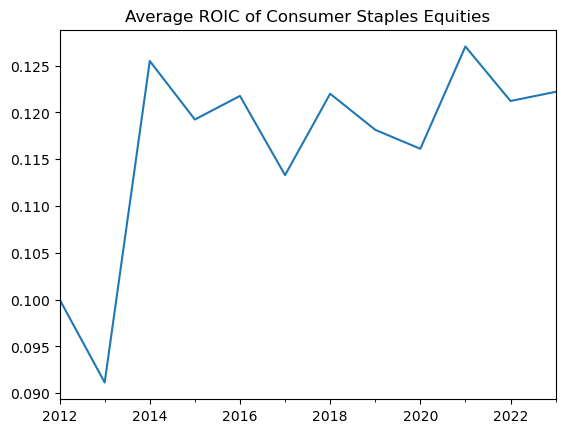

In [21]:
ROIC.dropna().mean(axis=1).plot(title= "Average ROIC of Consumer Staples Equities")

#### RETURN ON INCREMENTAL INVESTED CAPITAL (ROIIC): 

ROIIC measures capital allocation efficiency by comparing the change in a company’s Net Operating Profit After Taxes (NOPAT) relative the change in invested capital.

ROICC = Change in NOPAT $/$ Preceding Period Invested Capital

ROIIC = (Year1 NOPAT - Year0 NOPAT) $/$ (Year0 Invested Capital - Year1 Invested Capital)

In [22]:
ROIIC = NOPAT.diff() / INVESTED_CAPITAL.diff().shift(1)
ROIIC

,LANC,USNA,WBA,IMKTA,KO,IPAR,MKC,HAIN,CLX,MNST,...,AVO,SKIN,BHIL,NAPA,WEST,SOVO,OLPX,COCO,KVUE,US92202X209
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,-1.4572,-0.2624,1.0236,-0.2845,-0.1778,8.8795,-0.4052,0.1257,0.0691,0.2878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,0.7981,-0.6774,1.3299,0.2899,-0.3859,0.6896,-0.0321,0.1406,-0.5114,0.0174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,0.7583,0.3213,-0.0485,-0.2073,0.1536,-0.0281,0.1207,0.1545,-0.1968,0.3642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,-0.7098,0.3385,0.1972,-0.0698,-2.3050,-0.4451,1.2074,0.7160,0.2463,0.4819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,-0.2406,1.7664,-0.0043,0.5380,1.2132,-0.7201,-0.0144,-0.1920,36.5971,-0.8295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,2.0011,-4.0309,-0.4671,-0.1103,-0.8879,-0.2298,-0.0958,1.4204,-0.2663,-20.1783,...,0.4011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,0.4729,0.6353,0.6127,1.7748,-2.2752,-0.4546,-0.3571,-3.0687,0.7957,0.7073,...,1.5690,0.2863,NaN,0.0268,NaN,0.1413,1.8108,0.4063,NaN,NaN
2021-12-31,-0.1109,-0.5257,0.0347,-0.3007,1.5651,1.4940,0.0919,0.0097,0.4445,0.6222,...,2.3035,-0.1943,2.2902,0.3788,NaN,0.1810,0.2697,-28.9670,-0.0649,NaN


<Axes: >

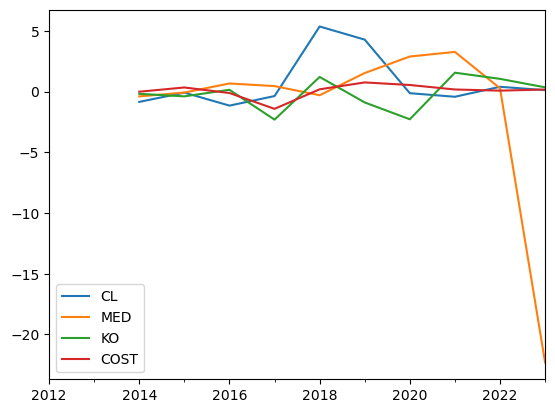

In [23]:
ROIIC.loc[:,["CL", "MED", "KO", "COST"]].plot()

ROICC can be very volatile, let's plot the mean on a rolling 3-year basis:

<Axes: >

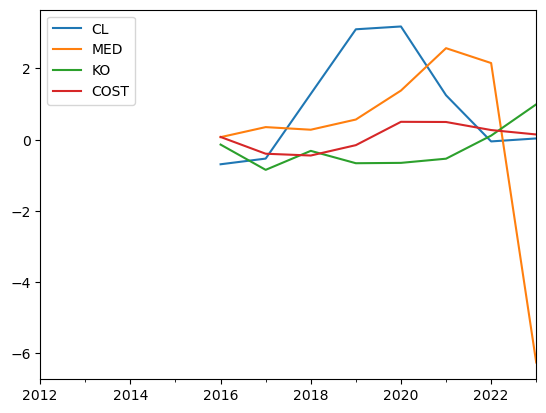

In [24]:
ROIIC.rolling(3).mean().loc[:,["CL", "MED", "KO", "COST"]].plot()

Despite having the highest ROIC, Medifast Inc (MED) is experiencing a decline in its incremental return on capital (ROIIC). Of course, we cannot conclude anything from that without further research.  